# Ryder: Global Expansion Research #
<a id="top" />

This Jupyter notebook contains the summaries and visualizations that should accompany the report on Ryder's company expansion into other countries, based on key indicators derived from a country's level of crime and stability, basic measures of health and wealth, and ratios of public education spending.

***

## Table of Contents ##

1. [Title](#top)
2. [Introduction](#introduction)
3. [Dependencies](#dependencies)
4. [Helpers](#helpers)
5. [Queries](#queries)

***

<a id="introduction" />

## Introduction ##

This notebook contains queries made against cleansed versions of the following Kaggle datasets:

- [Global Terrorism Database](https://www.kaggle.com/START-UMD/gtd) (2018)
- [Infant Mortality, Fertility, Income per Capita](https://www.kaggle.com/burhanykiyakoglu/infant-mortality-fertility-income) (2018)
- [Public Education Expenditure as share of GDP](https://www.kaggle.com/ibrahimmukherjee/gdp-world-bank-data#public-education-expenditure-as-share-of-gdp.csv) (2018)

Datasets were prepared using a combination of different commandline tools, including `bash`, `awk`, `sed`, and `python`. The original wide datasets were broken up to better facilitate querying. Details on that process are included in the accompanying documentation.

***

<a id="dependencies" />

## Dependencies ##

This notebook requires the following packages:

    - numpy
    - pandas 
    - matplotlib

Before we can plot information and fiddle with the data, we need to import these modules.


In [7]:
import numpy as np         # numpy library for vectorized computations.
import pandas as pd        # pandas library for manipulating dataframes.

### pandas & numpy ###

Pandas allows us to manipulate dataframes.

We can create these dataframes by reading in our data. `*.tsv` files can be imported using the `read_csv()` function. Note the custom `\t` separator used with tab-separated-value files.

```python
# Outputs a dataframe from a parsed data file.
dataframe = pd.read_csv("<filename>.tsv", sep="\t")
```

### matplotlib ###

We can also import matplotlib and the pylot modules for configuration and later use.

In [8]:
import matplotlib as mpl   # matplotlib library for global settings.
import matplotlib.pyplot as plt  # Our plotting functions from matplotlib.

In [9]:
print(plt.style.available)  # Display what styles are available.

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


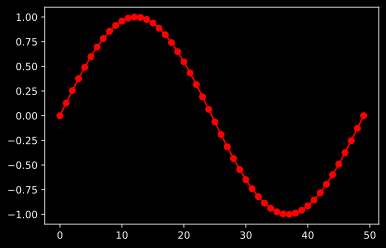

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
                                     # Above lines makes plots appear as inline svgs.
mpl.rcParams['figure.dpi'] = 300     # Apply DPI to matplotlib inline plots.
plt.style.use(['dark_background', 'seaborn-pastel'])     # Apply particular styles.
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')  # Make the plot.
plt.show()  # Show the plot.

***

<a id="helpers"></a>

## Helpers ##

The following are a set of useful helper functions, included as a way to simplify the more complex queries.

In [11]:
# Helper function for reading a *.tsv file into a dataframe.
def read_tsv(path):
    return pd.read_csv(path, sep="\t")


In [12]:
# Helper function for checking if string is empty.
def is_empty(str):
    return str is None or len(str) == 0

def is_whitespace(str):
    return is_empty(''.join(str.strip()))

def is_numeric(str):
    try:
        int(str)
        return True
    except ValueError:
        return False

def 

In [13]:
# Outputs a dataframe from a parsed data file.
countries_df = read_tsv("../data/country_codes.tsv")
countries_df

# Search country_codes.tsv for a join key by country via an id, code, or name.
def get_country_key(country):
    if country is None or len(country.strip()) == 0:
        raise ValueError("No key provided.")
    country = country.strip()
    if country in countries_df['Country'].values:
        return countries_df[countries_df['Country'] == country].iloc[0,:].array
    elif country in countries_df['Code'].values:
        return countries_df[countries_df['Code'] == country].iloc[0,:].array
    elif is_numeric(country):
        if int(country) in countries_df['ID'].values:
            return countries_df[countries_df['ID'] == int(country)].iloc[0,:].array
    else:
        # print(f'No key available for provided country name or code "{country}".')
        return None

# Search country_codes.tsv for multiple join keys given list of country information.
def get_country_keys(countries):
    if countries is None or len(countries) == 0:
        raise ValueError("No keys provided.")
    
    results = [get_country_key(country) for country in countries]
    keys = [key for key in results if key]
    if len(keys) == 0:
        return None
    else:
        return keys

# Print the key.        
def print_key(id, code, name):
    print(f'< [{id}], "{code}": "{name}" >')

# Print several keys.
def print_keys(keys):
    for key in keys:
        print_key(*key)

# Example of querying information for 1 country.
print_key(*get_country_key('AFG'))

# Example of querying multiple countries.
print_keys(get_country_keys(['AFG', 'JPN', 'USA', 'BEL']))

# Clear the namespace of temporary variables.
%reset_selective -f "^keys$"

< [4], "AFG": "Afghanistan" >
< [4], "AFG": "Afghanistan" >
< [101], "JPN": "Japan" >
< [217], "USA": "United States" >
< [21], "BEL": "Belgium" >


In [14]:
# Get np.array of unique countries that appear in 
# the public education expenditure dataset.
ped_countries_df = read_tsv("../data/ped/ped_countries.tsv")
unique_ped = np.array(ped_countries_df.iloc[:,0].unique())
keys_ped = { code: (id, name) for id, code, name in get_country_keys(unique_ped)}
# print(f'Countries in the public education expenditure dataset: {keys_ped}')

In [15]:
# Get np.array of unique countries that appear in 
# the infant mortality, fertility, income per capita dataset.
mfi_countries_df = read_tsv("../data/mfi/mfi_countries.tsv")
unique_mfi = np.array(mfi_countries_df.iloc[:,0].unique())
keys_mfi = { code: (id, name) for id, code, name in get_country_keys(unique_mfi)}
# print(f'Countries in the MFI datasets: {keys_mfi}')

In [16]:
# Get np.array of unique countries that appear in 
# the global terrorism database.
gtd_countries_df = read_tsv("../data/gtd/gtd_countries.tsv")
unique_gtd = np.array(gtd_countries_df.iloc[:,1].unique())
keys_gtd = { code: (id, name) for id, code, name in get_country_keys(unique_gtd)}
# print(f'Countries in the Global Terrorism Database: {keys_gtd}')

In [17]:
# Get a final unique list of the countries that appear in the intersection between all sources.
codes_ped = np.array(list(keys_ped.keys()))
codes_gtd = np.array(list(keys_gtd.keys()))
codes_mfi = np.array(list(keys_mfi.keys()))

# Unqiue codes.
unique_codes = np.unique([np.intersect1d(codes_ped, codes) for codes in [codes_mfi, codes_gtd]])
available_countries = pd.Series(get_country_keys(unique_codes), index=unique_codes)
available_countries

AUS          [14, AUS, Australia]
AUT            [15, AUT, Austria]
BEL            [21, BEL, Belgium]
CAN             [38, CAN, Canada]
CHE       [199, CHE, Switzerland]
DEU            [75, DEU, Germany]
ESP             [185, ESP, Spain]
FRA             [69, FRA, France]
GBR    [603, GBR, United Kingdom]
IRL            [96, IRL, Ireland]
ITA              [98, ITA, Italy]
JPN             [101, JPN, Japan]
NLD       [142, NLD, Netherlands]
NOR            [151, NOR, Norway]
NZL       [144, NZL, New Zealand]
SWE            [198, SWE, Sweden]
USA     [217, USA, United States]
dtype: object

In [18]:
# Clear unused variables in IPython.
%reset_selective -f "^id$"
%reset_selective -f "^code$"
%reset_selective -f "^name$"
%reset_selective -f "_ped$"
%reset_selective -f "_mfi$"
%reset_selective -f "_gtd$"
%reset_selective -f "_countries_df$"
%reset_selective -f "_countries_df$"
%reset_selective -f "_countries_df$"

***

<a id="queries" />

## Queries ##

The objective of the research project is to evaluate key indicators of stability and growth across several countries in order to estimate Ryder's potential for success in these new markets.

This sample report evaluates the trends in three (3) separate countries as a sampling of what the broader international research has to offer. **The United Kingdom** (GBR), **Japan** (JPN), and **Sweden** (SWE).

The **United States of America** (USA) is included in order to use our current operation region for context.

In [19]:
# The countries we want to evaluate.
codes = [
    "GBR",  # United Kingdom
    "JPN",  # Japan
    "SWE",   # Sweden,
    "USA"
    ]

# Are the countries available across all datasets?
# print([country in available_countries for country in codes])

# Get the country keys.
selected_countries = pd.DataFrame(get_country_keys(codes), columns=["ID", "Code", "Country"])
selected_countries = selected_countries.set_index("Code")
selected_countries

,ID,Country
Code,,
GBR,603,United Kingdom
JPN,101,Japan
SWE,198,Sweden
USA,217,United States


In order to query the data, we need to form our `pandas.DataFrame` representations.

For the infant mortality, fertility, and income per capita datasets, we need to assign a MultiIndex using the country code and the year.

In [20]:
# Parse the infant mortality dataset.
df = read_tsv('../data/mfi/mortality/mortality_long.tsv')

# Rename columns.
df.rename(columns={
    "Country Code": "Code",
    "Country Name": "Country", 
    "Mortality Rate": "Mortality"
    }, inplace=True)

# Select only the entries that have matching country codes.
df = df.loc[df['Code'].isin(selected_countries.index)]

# Create a MultiIndex using the country code and year.
df.set_index(['Code', 'Year'], inplace=True)

# Sort by country and year.
df.sort_index(ascending=True, inplace=True)

# Assign to mortality_df.
mortality_df = df
mortality_df

Country  Mortality
Code Year                           
GBR  1970  United Kingdom       18.0
     1971  United Kingdom       17.7
     1972  United Kingdom       17.1
     1973  United Kingdom       16.6
     1974  United Kingdom       16.0
...                   ...        ...
USA  2012   United States        6.0
     2013   United States        5.9
     2014   United States        5.8
     2015   United States        5.7
     2016   United States        5.6

[188 rows x 2 columns]

In [21]:
# Parse the NNI per Capita dataset.
df = read_tsv('../data/mfi/income/income_long.tsv')

# Rename columns.
df.rename(columns={
    "Country Code": "Code",
    "Country Name": "Country", 
    "Income per Capita": "Income"
    }, inplace=True)

# Select only the entries that have matching country codes.
df = df.loc[df['Code'].isin(selected_countries.index)]

# Create a MultiIndex using the country code and year.
df.set_index(['Code', 'Year'], inplace=True)

# Sort by country and year.
df.sort_index(ascending=True, inplace=True)

# Assign to income_df.
income_df = df
income_df

Country        Income
Code Year                              
GBR  1970  United Kingdom   2220.021490
     1971  United Kingdom   2484.150369
     1972  United Kingdom   2823.686879
     1973  United Kingdom   3192.310330
     1974  United Kingdom   3393.134062
...                   ...           ...
USA  2012   United States  44582.333450
     2013   United States  45548.288240
     2014   United States  47344.285540
     2015   United States  49058.089400
     2016   United States  49725.780530

[188 rows x 2 columns]

In [22]:
# Parse the fertility dataset.
df = read_tsv('../data/mfi/fertility/fertility_long.tsv')

# Rename columns.
df.rename(columns={
    "Country Code": "Code",
    "Country Name": "Country", 
    "Fertility Rate": "Fertility"
    }, inplace=True)

# Select only the entries that have matching country codes.
df = df.loc[df['Code'].isin(selected_countries.index)]

# Create a MultiIndex using the country code and year.
df.set_index(['Code', 'Year'], inplace=True)

# Sort by country and year.
df.sort_index(ascending=True, inplace=True)

# Assign to income_df.
fertility_df = df
fertility_df

Country  Fertility
Code Year                           
GBR  1970  United Kingdom        2.4
     1971  United Kingdom        2.4
     1972  United Kingdom        2.2
     1973  United Kingdom        2.0
     1974  United Kingdom        1.9
...                   ...        ...
USA  2012   United States        1.9
     2013   United States        1.9
     2014   United States        1.9
     2015   United States        1.8
     2016   United States        1.8

[188 rows x 2 columns]

For each of these countries, we want to answer the following questions:

    1. Is infant mortality improving, stable, or getting worse?
    2. Is income rising, stagnant, or falling?
    3. Does one country or another seem more or less stable than the others, and why do you say this?
    4. What changes do you predict for these countries, and why?

In [23]:
# For each country, 

# 1. Define query functions for summ

# 1. Determine summary statistics regarding infant mortality for comparison.
def summarize_mortality(country):
    keys = get_country_key(country)
    




# 2. Plot time-series of infant mortality rates for each country.
# 3. Make analysis.

In [24]:
# For each country,
# 1. Determine summary statistics regarding income rates for comparison.
# 2. Is income rising, stagnant, or falling? Plot time-series answering this query.
# 3. Make analysis.

In [25]:
# For each country,
# 1. Determine summary statistics regarding terrorism.
# 2. Does one country or another seem more or less stable than the others?
# 3. What trends do you see?

In [26]:
# For each country,
# 1. Extrapolate information given the previous trends.